17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

=== Training with padding length: 50 ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Test Accuracy: 0.8102
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.78      0.81     12500
           1       0.79      0.84      0.81     12500

    accuracy                           0.81     25000
   macro avg       0.81      0.81      0.81     25000
weighted avg       0.81      0.81      0.81     25000

Confusion Matrix:
[[ 9805  2695]
 [ 2050 10450]]

=== Training with padding length: 100 ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Test Accuracy: 0.8430
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
              precision    recall  f1-score   support

           0       0.83      0.86      0.85     12500
           1       0.85      0.83      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000

Confusion Matrix:
[[10722  1778]
 [ 2146 10354]]

=== Training with padding length: 200 ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Test Accuracy: 0.8698
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     12500
           1       0.88      0.86      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000

Confusion Matrix:
[[11004  1496]
 [ 1759 10741]]

=== Training with padding length: 300 ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Test Accuracy: 0.8738
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
              precision    recall  f1-score   support

           0       0.87      0.88      0.87     12500
           1       0.88      0.87      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000

Confusion Matrix:
[[11025  1475]
 [ 1680 10820]]

=== Training with padding length: 500 ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Test Accuracy: 0.8758
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     12500
           1       0.89      0.86      0.87     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000

Confusion Matrix:
[[11120  1380]
 [ 1724 10776]]


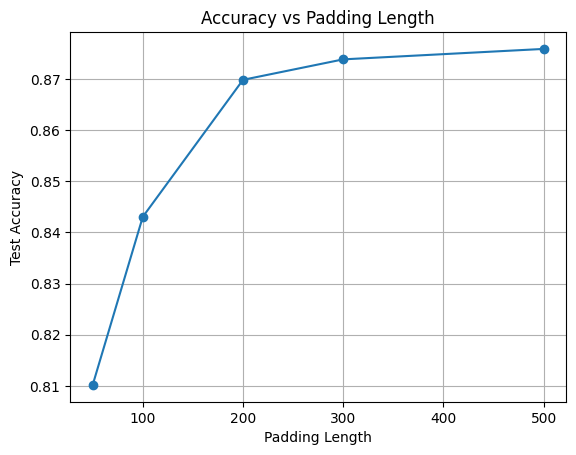

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import classification_report, confusion_matrix

#load dataset once
vocab_size = 10000
embedding_dim = 128
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

#try different padding lengths
padding_lengths = [50, 100, 200, 300, 500]
results = []

for max_len in padding_lengths:
    print(f"\n=== Training with padding length: {max_len} ===")

    #pad sequences
    X_train_padded = pad_sequences(X_train, maxlen=max_len)
    X_test_padded = pad_sequences(X_test, maxlen=max_len)

    #build model
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
        LSTM(units=64),
        Dense(1, activation='sigmoid')
    ])

    #compile and train
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train_padded, y_train, batch_size=128, epochs=3, validation_data=(X_test_padded, y_test), verbose=0)

    #evaluate
    loss, accuracy = model.evaluate(X_test_padded, y_test, verbose=0)
    print(f"Test Accuracy: {accuracy:.4f}")

    #predict
    y_pred_probs = model.predict(X_test_padded)
    y_pred = (y_pred_probs > 0.5).astype(int).flatten()

    #save results
    results.append((max_len, accuracy))
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))

#plot accuracy vs padding length
lengths, accs = zip(*results)
plt.plot(lengths, accs, marker='o')
plt.title('Accuracy vs Padding Length')
plt.xlabel('Padding Length')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()
